In [ ]:
#Automation_Crypto_API

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '6d68a6a5-429d-4b54-8ac9-d4b51c35e98a',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)



{'status': {'timestamp': '2023-10-15T17:06:21.208Z', 'error_code': 0, 'error_message': None, 'elapsed': 33, 'credit_count': 1, 'notice': None, 'total_count': 8908}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10494, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

/var/folders/mg/64r26z4114l8bf72d0qfr__m0000gn/T/ipykernel_18189/4244551283.py:4: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10494,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.951459e+07,1.951459e+07,False,NaN,1,NaN,NaN,None,2023-10-15T17:04:00.000Z,26928.320316,5.139995e+09,-32.3436,0.061650,-0.007194,-3.608262,2.144432,-7.253760,-10.708978,5.254952e+11,49.8525,5.654947e+11,None,2023-10-15T17:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 17:06:25.988241
1,1027,Ethereum,ETH,ethereum,7552,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202581e+08,1.202581e+08,True,NaN,2,NaN,NaN,None,2023-10-15T17:04:00.000Z,1555.754755,2.319908e+09,-33.7693,0.080725,-0.000634,-4.810098,-4.056682,-14.497342,-18.371293,1.870922e+11,17.7490,1.870922e+11,None,2023-10-15T17:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 17:06:25.988241
2,825,Tether USDt,USDT,tether,63714,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.352701e+10,8.662567e+10,True,NaN,3,NaN,NaN,None,2023-10-15T17:04:00.000Z,0.999986,1.044220e+10,-18.6562,-0.004009,-0.001103,-0.053295,-0.004715,0.121002,-0.010931,8.352582e+10,7.9238,8.662444e+10,None,2023-10-15T17:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-15 17:06:25.988241
3,1839,BNB,BNB,bnb,1682,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538448e+08,1.538448e+08,False,NaN,4,NaN,NaN,None,2023-10-15T17:04:00.000Z,209.663829,3.324090e+08,33.5677,0.086208,1.471156,-0.980610,-1.288555,-10.454475,-13.789932,3.225569e+10,3.0600,3.225569e+10,None,2023-10-15T17:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 17:06:25.988241
4,52,XRP,XRP,xrp,1114,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.344103e+10,9.998836e+10,False,NaN,5,NaN,NaN,None,2023-10-15T17:04:00.000Z,0.487527,3.623966e+08,-19.2048,0.086842,0.147577,-5.882881,-1.412208,-18.234748,-33.351164,2.605393e+10,2.4717,4.875268e+10,None,2023-10-15T17:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 17:06:25.988241
5,3408,USDC,USDC,usd-coin,14452,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.512300e+10,2.512300e+10,False,NaN,6,NaN,NaN,None,2023-10-15T17:04:00.000Z,1.000040,1.032255e+09,-33.4425,-0.004983,-0.005887,0.002984,-0.003904,0.001455,0.011626,2.512401e+10,2.3836,2.512401e+10,None,2023-10-15T17:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-15 17:06:25.988241
6,5426,Solana,SOL,solana,535,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.162579e+08,5.600332e+08,True,NaN,7,NaN,NaN,None,2023-10-15T17:04:00.000Z,21.791347,1.496815e+08,-41.4210,0.105231,-1.178115,-6.990653,15.471412,-6.009054,-18.796166,9.070821e+09,0.8605,1.220388e+10,None,2023-10-15T17:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 17:06:25.988241
7,2010,Cardano,ADA,cardano,946,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.521122e+10,3.625937e+10,False,NaN,8,NaN,NaN,None,2023-10-15T17:04:00.000Z,0.246611,7.232425e+07,-19.2906,0.172712,-0.360825,-4.215562,-0.443822,-9.993036,-21.164772,8.683466e+09,0.8238,1.109749e+10,None,2023-10-15T17:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 17:06:25.988241
8,74,Dogecoin,DOGE,dogecoin,807,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange,

In [5]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '6d68a6a5-429d-4b54-8ac9-d4b51c35e98a',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    
    # Use (append )to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)


    # Use to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile('/Users/shreyanshdalwadi/Downloads/DataAnalysis/API.csv'):
        df.to_csv('/Users/shreyanshdalwadi/Downloads/DataAnalysis/API.csv', header='column_names')
    else:
        df.to_csv('/Users/shreyanshdalwadi/Downloads/DataAnalysis/API.csv', mode='a', header=False)


In [6]:
import os 
from time import time
from time import sleep

for i in range(7):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

/var/folders/mg/64r26z4114l8bf72d0qfr__m0000gn/T/ipykernel_18189/3792161569.py:28: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
/var/folders/mg/64r26z4114l8bf72d0qfr__m0000gn/T/ipykernel_18189/3792161569.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/var/folders/mg/64r26z4114l8bf72d0qfr__m0000gn/T/ipykernel_18189/3792161569.py:34: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


/var/folders/mg/64r26z4114l8bf72d0qfr__m0000gn/T/ipykernel_18189/3792161569.py:28: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
/var/folders/mg/64r26z4114l8bf72d0qfr__m0000gn/T/ipykernel_18189/3792161569.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/var/folders/mg/64r26z4114l8bf72d0qfr__m0000gn/T/ipykernel_18189/3792161569.py:34: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


KeyboardInterrupt: 

In [7]:
import pandas as pd
df72 = pd.read_csv('/Users/shreyanshdalwadi/Downloads/DataAnalysis/API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10494,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.951459e+07,1.951459e+07,False,NaN,1,NaN,NaN,NaN,2023-10-15T16:30:00.000Z,26897.412767,5.106465e+09,-34.1990,-0.000741,-0.070315,-3.568983,2.040564,-7.055355,-10.958645,5.248921e+11,49.8648,5.648457e+11,NaN,2023-10-15T16:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 16:32:13.945329
1,1,1027,Ethereum,ETH,ethereum,7551,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202581e+08,1.202581e+08,True,NaN,2,NaN,NaN,NaN,2023-10-15T16:30:00.000Z,1552.435122,2.274004e+09,-36.4397,-0.056508,-0.093789,-4.797168,-4.202824,-14.441421,-18.763539,1.866930e+11,17.7359,1.866930e+11,NaN,2023-10-15T16:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 16:32:13.945329
2,2,825,Tether USDt,USDT,tether,63710,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.352701e+10,8.662567e+10,True,NaN,3,NaN,NaN,NaN,2023-10-15T16:30:00.000Z,1.000076,1.044018e+10,-19.6721,0.000255,0.000789,-0.057767,0.004979,0.130767,-0.029346,8.353336e+10,7.9357,8.663225e+10,NaN,2023-10-15T16:30:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-15 16:32:13.945329
3,3,1839,BNB,BNB,bnb,1682,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.538448e+08,1.538448e+08,False,NaN,4,NaN,NaN,NaN,2023-10-15T16:30:00.000Z,209.131673,3.293146e+08,30.1260,-0.050937,1.228818,-1.129231,-1.451473,-10.288074,-14.250416,3.217382e+10,3.0565,3.217382e+10,NaN,2023-10-15T16:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 16:32:13.945329
4,4,52,XRP,XRP,xrp,1114,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.344103e+10,9.998836e+10,False,NaN,5,NaN,NaN,NaN,2023-10-15T16:30:00.000Z,0.486913,3.572013e+08,-21.6737,0.051832,-0.027206,-6.002989,-1.490885,-18.070479,-35.412473,2.602113e+10,2.4720,4.869130e+10,NaN,2023-10-15T16:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 16:32:13.945329
5,5,3408,USDC,USDC,usd-coin,14451,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.512300e+10,2.512300e+10,False,NaN,6,NaN,NaN,NaN,2023-10-15T16:30:00.000Z,1.000118,1.042447e+09,-34.5024,0.005372,-0.005851,0.010474,0.003075,0.009440,-0.012532,2.512596e+10,2.3870,2.512596e+10,NaN,2023-10-15T16:30:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-15 16:32:13.945329
6,6,5426,Solana,SOL,solana,535,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.162579e+08,5.600332e+08,True,NaN,7,NaN,NaN,NaN,2023-10-15T16:30:00.000Z,21.747284,1.480952e+08,-42.8500,0.004656,-1.216216,-7.303520,15.437549,-5.549323,-19.685719,9.052480e+09,0.8600,1.217920e+10,NaN,2023-10-15T16:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 16:32:13.945329
7,7,2010,Cardano,ADA,cardano,946,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.521122e+10,3.625937e+10,False,NaN,8,NaN,NaN,NaN,2023-10-15T16:30:00.000Z,0.246175,7.207887e+07,-20.0975,0.063927,-0.461078,-4.237580,-0.687300,-9.977549,-21.804736,8.668114e+09,0.8235,1.107787e+10,NaN,2023-10-15T16:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 16:32:13.945329
8,8,74,Dogecoin,DOGE,dogecoin,806,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 

In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10494,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.951459e+07,1.951459e+07,False,NaN,1,NaN,NaN,None,2023-10-15T17:04:00.000Z,26928.320316,5.139995e+09,-32.3436,0.061650,-0.007194,-3.608262,2.144432,-7.253760,-10.708978,5.254952e+11,49.8525,5.654947e+11,None,2023-10-15T17:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 17:06:39.863904
1,1027,Ethereum,ETH,ethereum,7552,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202581e+08,1.202581e+08,True,NaN,2,NaN,NaN,None,2023-10-15T17:04:00.000Z,1555.754755,2.319908e+09,-33.7693,0.080725,-0.000634,-4.810098,-4.056682,-14.497342,-18.371293,1.870922e+11,17.7490,1.870922e+11,None,2023-10-15T17:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 17:06:39.863904
2,825,Tether USDt,USDT,tether,63714,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.352701e+10,8.662567e+10,True,NaN,3,NaN,NaN,None,2023-10-15T17:04:00.000Z,0.999986,1.044220e+10,-18.6562,-0.004009,-0.001103,-0.053295,-0.004715,0.121002,-0.010931,8.352582e+10,7.9238,8.662444e+10,None,2023-10-15T17:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-15 17:06:39.863904
3,1839,BNB,BNB,bnb,1682,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538448e+08,1.538448e+08,False,NaN,4,NaN,NaN,None,2023-10-15T17:04:00.000Z,209.663829,3.324090e+08,33.5677,0.086208,1.471156,-0.980610,-1.288555,-10.454475,-13.789932,3.225569e+10,3.0600,3.225569e+10,None,2023-10-15T17:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 17:06:39.863904
4,52,XRP,XRP,xrp,1114,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.344103e+10,9.998836e+10,False,NaN,5,NaN,NaN,None,2023-10-15T17:04:00.000Z,0.487527,3.623966e+08,-19.2048,0.086842,0.147577,-5.882881,-1.412208,-18.234748,-33.351164,2.605393e+10,2.4717,4.875268e+10,None,2023-10-15T17:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 17:06:39.863904
5,3408,USDC,USDC,usd-coin,14452,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.512300e+10,2.512300e+10,False,NaN,6,NaN,NaN,None,2023-10-15T17:04:00.000Z,1.000040,1.032255e+09,-33.4425,-0.004983,-0.005887,0.002984,-0.003904,0.001455,0.011626,2.512401e+10,2.3836,2.512401e+10,None,2023-10-15T17:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-15 17:06:39.863904
6,5426,Solana,SOL,solana,535,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.162579e+08,5.600332e+08,True,NaN,7,NaN,NaN,None,2023-10-15T17:04:00.000Z,21.791347,1.496815e+08,-41.4210,0.105231,-1.178115,-6.990653,15.471412,-6.009054,-18.796166,9.070821e+09,0.8605,1.220388e+10,None,2023-10-15T17:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 17:06:39.863904
7,2010,Cardano,ADA,cardano,946,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.521122e+10,3.625937e+10,False,NaN,8,NaN,NaN,None,2023-10-15T17:04:00.000Z,0.246611,7.232425e+07,-19.2906,0.172712,-0.360825,-4.215562,-0.443822,-9.993036,-21.164772,8.683466e+09,0.8238,1.109749e+10,None,2023-10-15T17:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 17:06:39.863904
8,74,Dogecoin,DOGE,dogecoin,807,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange,

In [9]:
# Data cleaning
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10494,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19514593.00000,19514593.00000,False,NaN,1,NaN,NaN,None,2023-10-15T17:04:00.000Z,26928.32032,5139994904.24602,-32.34360,0.06165,-0.00719,-3.60826,2.14443,-7.25376,-10.70898,525495211137.63733,49.85250,565494726633.06006,None,2023-10-15T17:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 17:06:39.863904
1,1027,Ethereum,ETH,ethereum,7552,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120258135.50325,120258135.50325,True,NaN,2,NaN,NaN,None,2023-10-15T17:04:00.000Z,1555.75476,2319908376.17834,-33.76930,0.08072,-0.00063,-4.81010,-4.05668,-14.49734,-18.37129,187092166188.49945,17.74900,187092166188.50000,None,2023-10-15T17:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 17:06:39.863904
2,825,Tether USDt,USDT,tether,63714,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83527007239.14531,86625667477.81340,True,NaN,3,NaN,NaN,None,2023-10-15T17:04:00.000Z,0.99999,10442195645.80286,-18.65620,-0.00401,-0.00110,-0.05330,-0.00472,0.12100,-0.01093,83525819875.45709,7.92380,86624436065.66000,None,2023-10-15T17:04:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-15 17:06:39.863904
3,1839,BNB,BNB,bnb,1682,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153844815.61152,153844815.61152,False,NaN,4,NaN,NaN,None,2023-10-15T17:04:00.000Z,209.66383,332409038.41279,33.56770,0.08621,1.47116,-0.98061,-1.28855,-10.45448,-13.78993,32255693128.92414,3.06000,32255693128.92000,None,2023-10-15T17:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 17:06:39.863904
4,52,XRP,XRP,xrp,1114,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53441027384.00000,99988362642.00000,False,NaN,5,NaN,NaN,None,2023-10-15T17:04:00.000Z,0.48753,362396624.28409,-19.20480,0.08684,0.14758,-5.88288,-1.41221,-18.23475,-33.35116,26053934153.79578,2.47170,48752682029.46000,None,2023-10-15T17:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 17:06:39.863904
5,3408,USDC,USDC,usd-coin,14452,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25122999486.92728,25122999486.92728,False,NaN,6,NaN,NaN,None,2023-10-15T17:04:00.000Z,1.00004,1032255055.49429,-33.44250,-0.00498,-0.00589,0.00298,-0.00390,0.00145,0.01163,25124010187.45340,2.38360,25124010187.45000,None,2023-10-15T17:04:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-15 17:06:39.863904
6,5426,Solana,SOL,solana,535,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,416257940.85015,560033179.35551,True,NaN,7,NaN,NaN,None,2023-10-15T17:04:00.000Z,21.79135,149681546.02404,-41.42100,0.10523,-1.17812,-6.99065,15.47141,-6.00905,-18.79617,9070821156.26828,0.86050,12203877242.88000,None,2023-10-15T17:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 17:06:39.863904
7,2010,Cardano,ADA,cardano,946,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35211215360.02400,36259372926.66300,False,NaN,8,NaN,NaN,None,2023-10-15T17:04:00.000Z,0.24661,72324254.74804,-19.29060,0.17271,-0.36082,-4.21556,-0.44382,-9.99304,-21.16477,8683465765.52295,0.82380,11097485714.51000,None,2023-10-15T17:04:00.

In [11]:


df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.06165,-0.00719,-3.60826,2.14443,-7.25376,-10.70898
Ethereum,0.08072,-0.00063,-4.81010,-4.05668,-14.49734,-18.37129
Tether USDt,-0.00401,-0.00110,-0.05330,-0.00472,0.12100,-0.01093
BNB,0.08621,1.47116,-0.98061,-1.28855,-10.45448,-13.78993
XRP,0.08684,0.14758,-5.88288,-1.41221,-18.23475,-33.35116
USDC,-0.00498,-0.00589,0.00298,-0.00390,0.00145,0.01163
Solana,0.10523,-1.17812,-6.99065,15.47141,-6.00905,-18.79617
Cardano,0.17271,-0.36082,-4.21556,-0.44382,-9.99304,-21.16477
Dogecoin,0.07668,0.06518,-2.89750,-4.16078,-14.10314,-14.05315


In [12]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.06165
             quote.USD.percent_change_24h    -0.00719
             quote.USD.percent_change_7d     -3.60826
             quote.USD.percent_change_30d     2.14443
             quote.USD.percent_change_60d    -7.25376
             quote.USD.percent_change_90d   -10.70898
Ethereum     quote.USD.percent_change_1h      0.08072
             quote.USD.percent_change_24h    -0.00063
             quote.USD.percent_change_7d     -4.81010
             quote.USD.percent_change_30d    -4.05668
             quote.USD.percent_change_60d   -14.49734
             quote.USD.percent_change_90d   -18.37129
Tether USDt  quote.USD.percent_change_1h     -0.00401
             quote.USD.percent_change_24h    -0.00110
             quote.USD.percent_change_7d     -0.05330
             quote.USD.percent_change_30d    -0.00472
             quote.USD.percent_change_60d     0.12100
             quote.USD.percent_change_90

In [13]:
type(df4)

pandas.core.series.Series

In [14]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.06165
            quote.USD.percent_change_24h  -0.00719
            quote.USD.percent_change_7d   -3.60826
            quote.USD.percent_change_30d   2.14443
            quote.USD.percent_change_60d  -7.25376
            quote.USD.percent_change_90d -10.70898
Ethereum    quote.USD.percent_change_1h    0.08072
            quote.USD.percent_change_24h  -0.00063
            quote.USD.percent_change_7d   -4.81010
            quote.USD.percent_change_30d  -4.05668
            quote.USD.percent_change_60d -14.49734
            quote.USD.percent_change_90d -18.37129
Tether USDt quote.USD.percent_change_1h   -0.00401
            quote.USD.percent_change_24h  -0.00110
            quote.USD.percent_change_7d   -0.05330
            quote.USD.percent_change_30d  -0.00472
            quote.USD.percent_change_60d   0.12100
            quote.USD.percent_change_90d  -0.01093
BNB         quote.USD.percent_change_1h    0.08621
            quote.USD.percent_change_24h   1.47116
            quote.USD.percent_change_7d   -0.98061
            quote.USD.percent_change_30d  -1.28855
            quote.USD.percent_change_60d -10.45448
            quote.USD.percent_change_90d -13.78993
XRP         quote.USD.percent_change_1h    0.08684
            quote.USD.percent_change_24h   0.14758
            quote.USD.percent_change_7d   -5.88288
            quote.USD.percent_change_30d  -1.41221
            quote.USD.percent_change_60d -18.23475
            quote.USD.percent_change_90d -33.35116
USDC        quote.USD.percent_change_1h   -0.00498
            quote.USD.percent_change_24h  -0.00589
            quote.USD.percent_change_7d    0.00298
            quote.USD.percent_change_30d  -0.00390
            quote.USD.percent_change_60d   0.00145
            quote.USD.percent_change_90d   0.01163
Solana      quote.USD.percent_change_1h    0.10523
            quote.USD.percent_change_24h  -1.17812
            quote.USD.percent_change_7d   -6.99065
            quote.USD.percent_change_30d  15.47141
            quote.USD.percent_change_60d  -6.00905
            quote.USD.percent_change_90d -18.79617
Cardano     quote.USD.percent_change_1h    0.17271
            quote.USD.percent_change_24h  -0.36082
            quote.USD.percent_change_7d   -4.21556
            quote.USD.percent_change_30d  -0.44382
            quote.USD.percent_change_60d  -9.99304
            quote.USD.percent_change_90d -21.16477
Dogecoin    quote.USD.percent_change_1h    0.07668
            quote.USD.percent_change_24h   0.06518
            quote.USD.percent_change_7d   -2.89750
            quote.USD.percent_change_30d  -4.16078
            quote.USD.percent_change_60d -14.10314
            quote.USD.percent_change_90d -14.05315
TRON        quote.USD.percent_change_1h    0.29183
            quote.USD.percent_change_24h   0.46657
            quote.USD.percent_change_7d   -2.70352
            quote.USD.percent_change_30d   2.37120
            quote.USD.percent_change_60d  13.62729
            quote.USD.percent_change_90d   7.85647
Toncoin     quote.USD.percent_change_1h   -0.04953
            quote.USD.percent_change_24h  -0.18008
            quote.USD.percent_change_7d   -6.99600
            quote.USD.percent_change_30d  -2.64254
            quote.USD.percent_change_60d  35.45128
            quote.USD.percent_change_90d  42.64196
Dai         quote.USD.percent_change_1h   -0.00340
            quote.USD.percent_change_24h  -0.02138
            quote.USD.percent_change_7d    0.00310
            quote.USD.percent_change_30d  -0.00170
            quote.USD.percent_change_60d   0.05226
            quote.USD.percent_change_90d   0.07342
Polygon     quote.USD.percent_change_1h    0.04710
            quote.USD.percent_change_24h  -0.92135
            quote.USD.percent_change_7d   -8.56296
            quote.USD.percent_change_30d  -0.99812
            quote.USD.percent_change_60d -17.37250
            quo

In [15]:
df5.count()

values    90
dtype: int64

In [33]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. 


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.set_index(index)
df6


# If it only has the index and values try doing reset_index like "df5.reset_index()"

,index,name,level_1,values
0,0,Bitcoin,quote.USD.percent_change_1h,0.06165
1,1,Bitcoin,quote.USD.percent_change_24h,-0.00719
2,2,Bitcoin,quote.USD.percent_change_7d,-3.60826
3,3,Bitcoin,quote.USD.percent_change_30d,2.14443
4,4,Bitcoin,quote.USD.percent_change_60d,-7.25376
5,5,Bitcoin,quote.USD.percent_change_90d,-10.70898
6,6,Ethereum,quote.USD.percent_change_1h,0.08072
7,7,Ethereum,quote.USD.percent_change_24h,-0.00063
8,8,Ethereum,quote.USD.percent_change_7d,-4.81010
9,9,Ethereum,quote.USD.percent_change_30d,-4.05668


In [34]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,index,name,percent_change,values
0,0,Bitcoin,quote.USD.percent_change_1h,0.06165
1,1,Bitcoin,quote.USD.percent_change_24h,-0.00719
2,2,Bitcoin,quote.USD.percent_change_7d,-3.60826
3,3,Bitcoin,quote.USD.percent_change_30d,2.14443
4,4,Bitcoin,quote.USD.percent_change_60d,-7.25376
5,5,Bitcoin,quote.USD.percent_change_90d,-10.70898
6,6,Ethereum,quote.USD.percent_change_1h,0.08072
7,7,Ethereum,quote.USD.percent_change_24h,-0.00063
8,8,Ethereum,quote.USD.percent_change_7d,-4.81010
9,9,Ethereum,quote.USD.percent_change_30d,-4.05668


In [35]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,index,name,percent_change,values
0,0,Bitcoin,quote.USD.percent_change_1h,0.06165
1,1,Bitcoin,24h,-0.00719
2,2,Bitcoin,7d,-3.60826
3,3,Bitcoin,30d,2.14443
4,4,Bitcoin,60d,-7.25376
5,5,Bitcoin,90d,-10.70898
6,6,Ethereum,quote.USD.percent_change_1h,0.08072
7,7,Ethereum,24h,-0.00063
8,8,Ethereum,7d,-4.81010
9,9,Ethereum,30d,-4.05668


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

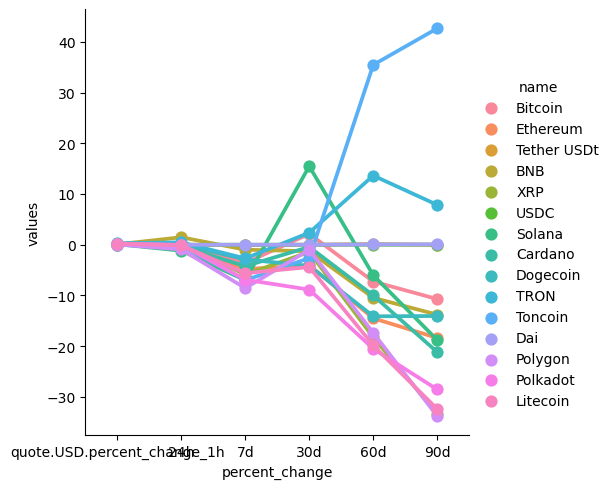

In [37]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [38]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,26928.32032,2023-10-15 17:06:39.863904


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

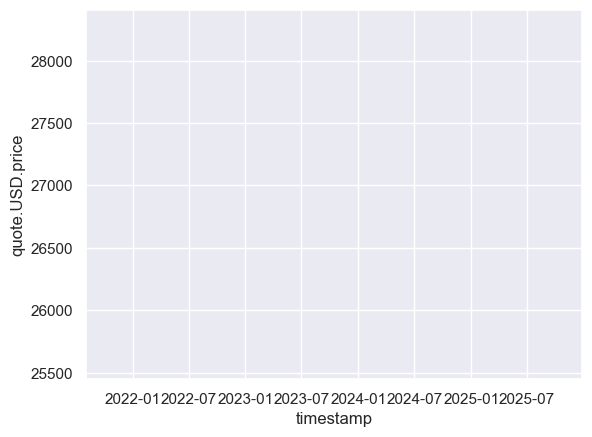

In [39]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)